In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#导入data2数据
data = pd.read_csv('./data/task1_x2.csv',encoding='gbk')
data.shape

(441611, 17)

In [3]:
#按照小时划分早中晚餐
data['meal'] = ''
def judgemeal(data):
    if data['hour'] <11:
        return '早餐'
    elif data['hour']>16:
        return '晚餐'
    else:
        return '午餐'

data['meal'] = data.apply(lambda x:judgemeal(x), axis=1)
data.shape

(441611, 18)

In [4]:
#按校园卡号CardNo,meal,Date进行去重
data.drop_duplicates(['CardNo','day','meal'],keep ='first',inplace=True)
data.shape

(235541, 18)

In [5]:
#保存文件
data_path='Desktop/result/task2_X1.csv'   
data.to_csv(data_path,index=None)  

In [6]:
#统计各食堂的就餐人次
data.Dept.value_counts()

第二食堂    72424
第五食堂    59729
第四食堂    46799
第三食堂    32129
第一食堂    22642
教师食堂     1818
Name: Dept, dtype: int64

In [7]:
#将工作日对应1，非工作日对应0
data['panduan'] = ''
def judgemeal(data):
    if data['weekday'] <6:
        return '1'
    else:
        return '0'

data['panduan'] = data.apply(lambda x:judgemeal(x), axis=1)
data.shape

(235541, 19)

In [8]:
#查看工作日与非工作日的数量
data.panduan.value_counts()

1    205117
0     30424
Name: panduan, dtype: int64

In [9]:
#修改4月5号为非工作日
data['panduan1'] = ''
def judgemeal(data):
    if data['day'] == 5:
        return data['panduan'] == 0
    else:
        return data['panduan'] 

data['panduan1'] = data.apply(lambda x:judgemeal(x), axis=1)
data.shape

(235541, 20)

In [10]:
#查看工作日与非工作日的数量
data.panduan1.value_counts()

1        202200
0         30424
False      2917
Name: panduan1, dtype: int64

In [11]:
#将筛选出day=5改为0，即非工作日
data['panduan1'] = data['panduan1'].replace(False,'0')
data.panduan1.value_counts()

1    202200
0     33341
Name: panduan1, dtype: int64

In [12]:
#保存文件
data_path='Desktop/result/task2_X2.csv'   
data.to_csv(data_path,index=None)  

In [13]:
#将新增加的panduan1类型改为整型
data['panduan1'] = data['panduan1'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235541 entries, 0 to 441609
Data columns (total 20 columns):
Index        235541 non-null int64
CardNo       235541 non-null int64
PeoNo        235541 non-null int64
Date         235541 non-null object
Money        235541 non-null float64
FundMoney    235541 non-null float64
Surplus      235541 non-null float64
CardCount    235541 non-null int64
Type         235541 non-null object
Dept         235541 non-null object
year         235541 non-null int64
month        235541 non-null int64
weekday      235541 non-null int64
day          235541 non-null int64
hour         235541 non-null int64
minute       235541 non-null int64
second       235541 non-null int64
meal         235541 non-null object
panduan      235541 non-null object
panduan1     235541 non-null int32
dtypes: float64(3), int32(1), int64(11), object(5)
memory usage: 36.8+ MB


In [14]:
#提取早中晚餐的消费记录
data1 = data.loc[data['meal'].isin(['早餐'])]
data2 = data.loc[data['meal'].isin(['午餐'])]
data3 = data.loc[data['meal'].isin(['晚餐'])]

In [15]:
#提取早中晚餐各食堂的消费情况
breakfast_dept = data1.Dept.value_counts()
lunch_dept = data2.Dept.value_counts()
dinner_dept = data3.Dept.value_counts()

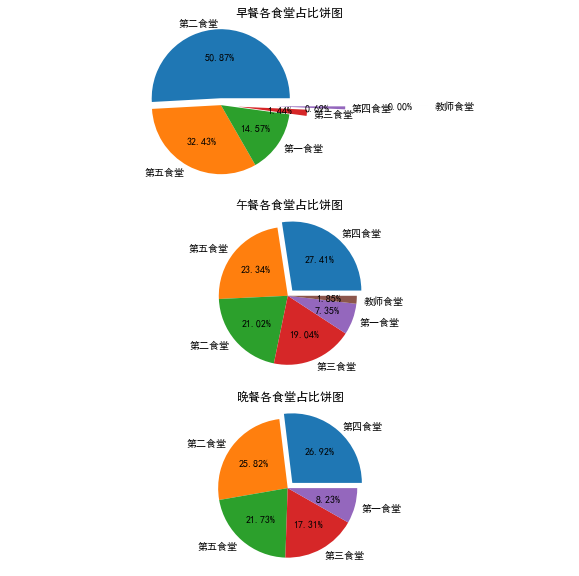

In [16]:
# 绘制早中晚餐各食堂就餐人次占比饼图
plt.rcParams['font.sans-serif']='SimHei'   # 显示中文
plt.rcParams['axes.unicode_minus']=False  # 显示负号

#设置画布
p = plt.figure(figsize=(10,10))

#子图1
ax1 = p.add_subplot(3,1,1)
y1 = breakfast_dept
x1 = y1.index
plt.pie(y1,labels=x1,autopct='%.2f%%',explode=[0.1,0,0,0.25,0.8,2])
plt.axis('equal')
plt.title('早餐各食堂占比饼图')

#子图2
ax2 = p.add_subplot(3,1,2)
y2 = lunch_dept
x2 = y2.index
plt.pie(y2,labels=x2,autopct='%.2f%%',explode=[0.1,0,0,0,0,0])
plt.axis('equal')
plt.title('午餐各食堂占比饼图')

#子图3
ax3 = p.add_subplot(3,1,3)
y3 = dinner_dept
x3 = y3.index
plt.pie(y3,labels=x3,autopct='%.2f%%',explode=[0.1,0,0,0,0])
plt.axis('equal')
plt.title('晚餐各食堂占比饼图')

#保存并显示图形
plt.savefig('data/各食堂就餐人次占比饼图.png')
plt.show()

In [17]:
#提取各食堂的消费记录
data1 = data.loc[data['Dept'].isin(['第一食堂'])]
data2 = data.loc[data['Dept'].isin(['第二食堂'])]
data3 = data.loc[data['Dept'].isin(['第三食堂'])]
data4 = data.loc[data['Dept'].isin(['第四食堂'])]
data5 = data.loc[data['Dept'].isin(['第五食堂'])]
data6 = data.loc[data['Dept'].isin(['教师食堂'])]

In [18]:
##提取各食堂工作日消费记录
data1_weekday = data1.loc[(data['panduan1'].apply(lambda x: x in [1])),  :]
data2_weekday = data2.loc[(data['panduan1'].apply(lambda x: x in [1])),  :]
data3_weekday = data3.loc[(data['panduan1'].apply(lambda x: x in [1])),  :]
data4_weekday = data4.loc[(data['panduan1'].apply(lambda x: x in [1])),  :]
data5_weekday = data5.loc[(data['panduan1'].apply(lambda x: x in [1])),  :]
data6_weekday = data6.loc[(data['panduan1'].apply(lambda x: x in [1])),  :]

In [19]:
#提取各食堂非工作日消费记录
data1_weekend = data1.loc[(data['panduan1'].apply(lambda x: x in [0])),  :]
data2_weekend = data2.loc[(data['panduan1'].apply(lambda x: x in [0])),  :]
data3_weekend = data3.loc[(data['panduan1'].apply(lambda x: x in [0])),  :]
data4_weekend = data4.loc[(data['panduan1'].apply(lambda x: x in [0])),  :] 
data5_weekend = data5.loc[(data['panduan1'].apply(lambda x: x in [0])),  :]
data6_weekend = data6.loc[(data['panduan1'].apply(lambda x: x in [0])),  :]

In [20]:
#计算工作日各食堂平均就餐人次
amount1_weekday = (data1_weekday.groupby(['hour']).size())/30
amount2_weekday = (data2_weekday.groupby(['hour']).size())/30
amount3_weekday = (data3_weekday.groupby(['hour']).size())/30
amount4_weekday = (data4_weekday.groupby(['hour']).size())/30
amount5_weekday = (data5_weekday.groupby(['hour']).size())/30
amount6_weekday = (data6_weekday.groupby(['hour']).size())/30

In [21]:
#计算非工作日各食堂平均就餐人次
amount1_weekend = (data1_weekend.groupby(['hour']).size())/30
amount2_weekend = (data2_weekend.groupby(['hour']).size())/30
amount3_weekend = (data3_weekend.groupby(['hour']).size())/30
amount4_weekend = (data4_weekend.groupby(['hour']).size())/30
amount5_weekend = (data5_weekend.groupby(['hour']).size())/30
amount6_weekend = (data6_weekend.groupby(['hour']).size())/30

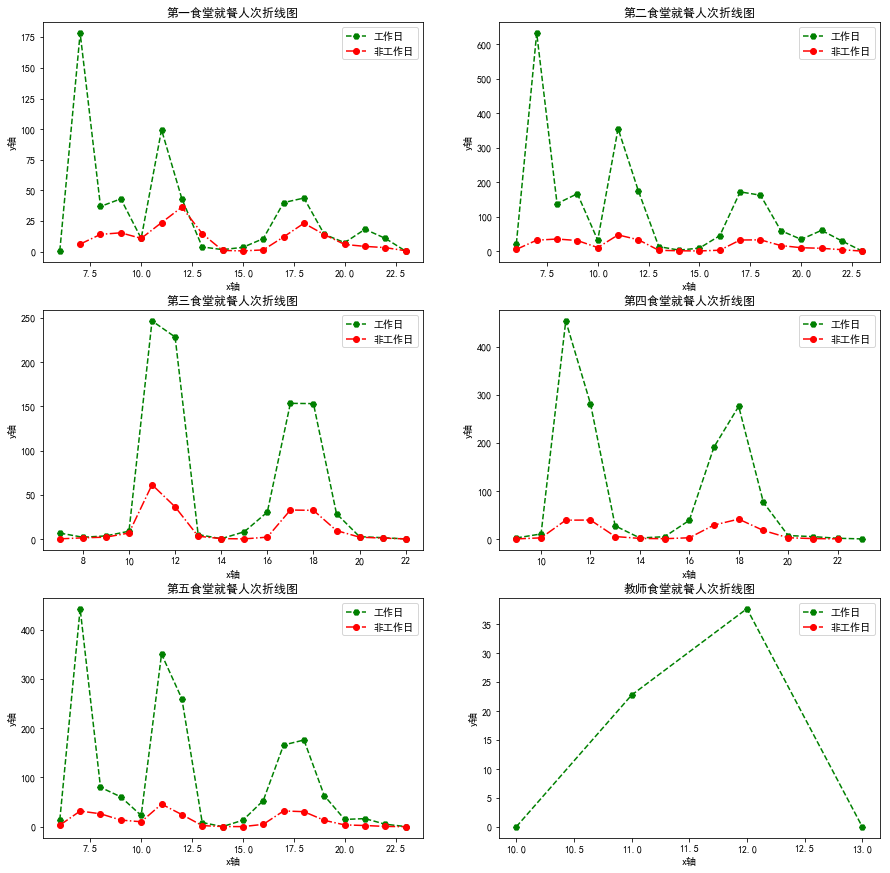

In [22]:
## 设置画布
p = plt.figure(figsize=(15,15))

## 子图1
ax1 = p.add_subplot(3,2,1)
plt.plot(amount1_weekday.index,amount1_weekday,'gH--',
         amount1_weekend.index,amount1_weekend,'ro-.')

plt.xlabel('x轴')   # 设置x轴标签
plt.ylabel('y轴')  # 设置y轴标签
plt.title('第一食堂就餐人次折线图')
plt.legend(['工作日','非工作日'])

## 子图2
ax2 = p.add_subplot(3,2,2)
plt.plot(amount2_weekday.index,amount2_weekday,'gH--',
         amount2_weekend.index,amount2_weekend,'ro-.')

plt.xlabel('x轴')   # 设置x轴标签
plt.ylabel('y轴')  # 设置y轴标签
plt.title('第二食堂就餐人次折线图')
plt.legend(['工作日','非工作日'])


## 子图3
ax3 = p.add_subplot(3,2,3)
plt.plot(amount3_weekday.index,amount3_weekday,'gH--',
         amount3_weekend.index,amount3_weekend,'ro-.')
plt.xlabel('x轴')   # 设置x轴标签
plt.ylabel('y轴')  # 设置y轴标签
plt.title('第三食堂就餐人次折线图')
plt.legend(['工作日','非工作日'])

## 子图4
ax4 = p.add_subplot(3,2,4)
plt.plot(amount4_weekday.index,amount4_weekday,'gH--',
         amount4_weekend.index,amount4_weekend,'ro-.')
plt.xlabel('x轴')   # 设置x轴标签
plt.ylabel('y轴')  # 设置y轴标签
plt.title('第四食堂就餐人次折线图')
plt.legend(['工作日','非工作日'])

## 子图5
ax5 = p.add_subplot(3,2,5)
plt.plot(amount5_weekday.index,amount5_weekday,'gH--',
         amount5_weekend.index,amount5_weekend,'ro-.')

plt.xlabel('x轴')   # 设置x轴标签
plt.ylabel('y轴')  # 设置y轴标签
plt.title('第五食堂就餐人次折线图')
plt.legend(['工作日','非工作日'])


## 子图6
ax6 = p.add_subplot(3,2,6)
plt.plot(amount6_weekday.index,amount6_weekday,'gH--',
         amount6_weekend.index,amount6_weekend,'ro-.')

plt.xlabel('x轴')   # 设置x轴标签
plt.ylabel('y轴')  # 设置y轴标签
plt.title('教师食堂就餐人次折线图')
plt.legend(['工作日','非工作日'])


## 保存并显示图形
plt.savefig('data/各食堂就餐人次折线图.png')
plt.show()